In [72]:
import pandas as pd
import matplotlib.pyplot as plt

## Variant 2
# 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27

In [73]:
df = pd.read_csv('NationalNames.csv').dropna()

# Task 3

In [74]:
names = df.columns.values
print(names)

['Id' 'Name' 'Year' 'Gender' 'Count']


# Task 4

In [75]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


# Task 5

In [76]:
df['Name'].nunique()

93889

# Task 8

In [77]:
def get_most_popular_name(year):
    df_year = df[df['Year'] == year]
    max_count = df_year['Count'].max()
    most_popular_name = df_year[df_year['Count'] == max_count]['Name'].iloc[0]
    return most_popular_name

#year = int(input("Enter a year"))
year = 1947
print("The name is '{}' in year {}".format(get_most_popular_name(year), year))

The name is 'Linda' in year 1947


# Task 9

In [78]:
df.query(f"Count == {df['Count'].min()}")['Id'].count()

254615

# Task 11

In [79]:
unique_names_by_year = df.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_by_year.idxmax()
year_with_most_unique_names

2008

# Task 12

In [80]:
df_most_popular = df[df['Year'] == year_with_most_unique_names]
max_count = df_most_popular['Count'].max()
most_popular_name = df_most_popular[df_most_popular['Count'] == max_count]['Name'].iloc[0]
most_popular_name

'Jacob'

# Task 13

In [81]:
df_jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
max_count_jacob_female = df_jacob_female['Count'].max()
year_jacob_female_most_popular = df_jacob_female[df_jacob_female['Count'] == max_count_jacob_female]

print(year_jacob_female_most_popular)

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


# Task 14

In [82]:
male_names = df[df['Gender'] == 'M'].groupby(['Year', 'Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Year', 'Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
male_names = male_names.loc[gender_neutral_names]
gender_neutral_counts = male_names.groupby(level=0).count()
gender_neutral_counts.sort_values(ascending=False).head(1)

Year
2008    2557
Name: Count, dtype: int64

# Task 16

In [83]:
df.groupby('Year')['Count'].sum().to_frame().idxmax()

Count    1957
dtype: int64

# Task 17

In [84]:
df.groupby(['Year', 'Gender'])['Count'].sum().to_frame()

Count
Year Gender         
1880 F         90993
     M        110491
1881 F         91954
     M        100745
1882 F        107850
...              ...
2012 M       1889414
2013 F       1745339
     M       1881463
2014 F       1768775
     M       1901376

[270 rows x 1 columns]

# Task 18

In [85]:
year_to_male = df.query('Gender == "M"').groupby('Year')['Count'].sum()
year_to_female = df.query('Gender == "F"').groupby('Year')['Count'].sum()
(year_to_female > year_to_male).sum()

54

# Task 19

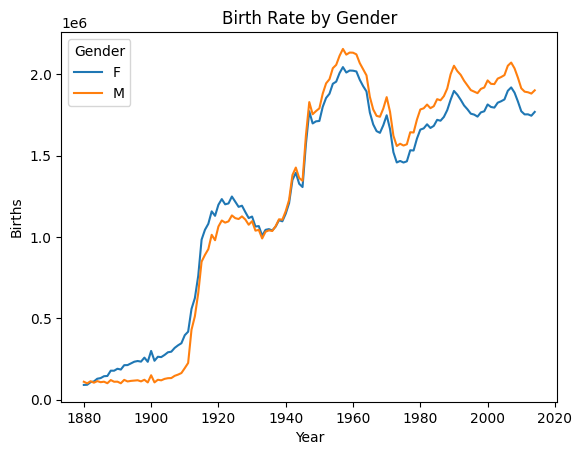

In [86]:
grouped = df.groupby(['Year', 'Gender'])['Count'].sum()
reshaped = grouped.unstack()
reshaped.plot()

plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Birth Rate by Gender')

plt.show()

# Task 20

In [87]:
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
male.isin(female).sum()

10221

# Task 22

In [88]:
df['Year'].max() - df['Year'].min()

134

# Task 23

In [89]:
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
nosex_names = male[male.isin(female)]
years_count = df.Year.unique().size
df[df.Name.isin(nosex_names)].groupby('Name').filter(lambda d: d['Year'].unique().size == years_count).groupby('Name')['Count'].max().sort_values(ascending=False).to_frame()

,Count
Name,
Linda,99680
James,94755
Michael,92709
Robert,91642
John,88318
...,...
Price,64
Nevada,60
Ara,55


# Task 24

In [90]:
unpopular_names = df[df['Count'] == df['Count'].min()]
grouped = unpopular_names.groupby('Name')['Count'].sum()
most_popular = grouped.idxmax()
most_popular_count = grouped.loc[grouped.idxmax()]

print('The most popular name of unpopular names is {}. It was used {} times'.format(most_popular, most_popular_count))

The most popular name of unpopular names is Celester. It was used 160 times


# Task 27

In [91]:
df.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']]).reset_index()

,Year,Name,Count
0,1880,John,9655
1,1881,John,8769
2,1882,John,9557
3,1883,John,8894
4,1884,John,9388
...,...,...,...
130,2010,Isabella,22883
131,2011,Sophia,21816
132,2012,Sophia,22267
133,2013,Sophia,21147
